In [1]:
import pandas as pd
import xml.etree.ElementTree as ET

In [2]:
data = pd.read_csv('data/predictions_100.csv')
data = data.drop(data.columns[0], axis=1)
data['path'] = data['path'].apply(lambda x: str(x)[60:]) #Only keep the general folder structure

In [3]:
#This could probably be made a lot more efficiently
#Extract the PublicIdentifiers from the files that are in the prediction dataset
paths = data['path'].unique() #Extract all the unique paths
public_ids = {}
for path in paths:
    tree = ET.parse(f"data/{path}")
    f = tree.find('NewsItem') #Traverse down the xml file
    public_ids[path] = list(f.iter('PublicIdentifier'))[0].text

data['PublicID'] = data['path'].map(public_ids)
del public_ids
data.head()

,path,sentence,prediction,PublicID
0,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,India skipper Virat Kohli on Wednesday credite...,1,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...
1,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""There is always too much noise and too much c...",1,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...
2,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""The reason for our success has been that we h...",1,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...
3,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,England captain Joe Root said Test players sho...,2,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...
4,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""I think that's part and parcel of Test cricke...",0,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...


In [4]:
#Add Asrael's URI's to the dataset. Note that some ID's can't be matched
URIs = pd.read_csv("Data/URI_ID.csv")
data = data.join(URIs.set_index('Identifier'), on='PublicID')
del URIs
data.head()

,path,sentence,prediction,PublicID,URI
0,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,India skipper Virat Kohli on Wednesday credite...,1,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
1,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""There is always too much noise and too much c...",1,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
2,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""The reason for our success has been that we h...",1,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
3,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,England captain Joe Root said Test players sho...,2,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
4,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""I think that's part and parcel of Test cricke...",0,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN


In [5]:
classes = {1: "cause", 2: "enable", 3: "intend", 4: "prevent"} #The classes to replace in the dataframe
data['prediction'] = data['prediction'].replace(classes)
del classes
data.head()

,path,sentence,prediction,PublicID,URI
0,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,India skipper Virat Kohli on Wednesday credite...,cause,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
1,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""There is always too much noise and too much c...",cause,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
2,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""The reason for our success has been that we h...",cause,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
3,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,England captain Joe Root said Test players sho...,enable,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN
4,afp_2021/2021/03/03/afp.com-20210303T141025Z-T...,"""I think that's part and parcel of Test cricke...",0,urn:newsml:afp.com:20210303T141025Z:TX-PAR-TVY...,NaN


In [6]:
data = data.dropna() #For now remove the rows which don't have an URI. Have to check if this is the right way
data = data[data.prediction != 0] #rows with 0 class can be removed
data.reset_index(inplace=True, drop=True)

In [19]:
data[data['PublicID'] == 'urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP85:1']

,path,sentence,prediction,PublicID,URI
2,afp_2021/2021/03/03/afp.com-20210303T074352Z-T...,At least 10 rockets hit a military base in wes...,prevent,urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP...,http://asrael.eurecom.fr/news/35f2598c-5036-34...
3,afp_2021/2021/03/03/afp.com-20210303T074352Z-T...,The Ain al-Assad base hosts Iraqi forces as we...,enable,urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP...,http://asrael.eurecom.fr/news/35f2598c-5036-34...
4,afp_2021/2021/03/03/afp.com-20210303T074352Z-T...,"Iraqi security forces said 10 ""Grad-type rocke...",prevent,urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP...,http://asrael.eurecom.fr/news/35f2598c-5036-34...
5,afp_2021/2021/03/03/afp.com-20210303T074352Z-T...,Western security sources told AFP that the roc...,cause,urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP...,http://asrael.eurecom.fr/news/35f2598c-5036-34...
6,afp_2021/2021/03/03/afp.com-20210303T074352Z-T...,Dozens of rocket attacks and roadside bombs ta...,prevent,urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP...,http://asrael.eurecom.fr/news/35f2598c-5036-34...
7,afp_2021/2021/03/03/afp.com-20210303T074352Z-T...,They came to a near-complete halt in October f...,cause,urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP...,http://asrael.eurecom.fr/news/35f2598c-5036-34...
8,afp_2021/2021/03/03/afp.com-20210303T074352Z-T...,"In mid-February, rockets targeted US-led coali...",prevent,urn:newsml:afp.com:20210303T074352Z:TX-PAR-TVP...,http://asrael.eurecom.fr/news/35f2598c-5036-34...


In [8]:
#Create a graph based on the created dataframe

from rdflib import Graph, Literal, RDF, URIRef, OWL, Namespace
from resources import *

rnews = Namespace("http://iptc.org/std/rNews/2011-10-07#")
nif = Namespace("http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#")
faro = Namespace("https://purl.org/faro/")

faro_classes = {'cause': faro.causes, 'enable': faro.enables, 'intend': faro.intends_to_cause, 'prevent': faro.prevents} #dict of faro definitions

graph = Graph()

for index, row in data.iterrows():

    graph.add((URIRef(row['URI']), RDF.type, rnews.Article )) #Add the URI as article
    graph.add((URIRef(row['URI']), rnews.identifier, Literal(row['PublicID']))) #Link the PublicID to the article
    sentence_uri = node_creation('', row['sentence'], base_add='/sentence') #Generate the URI for the sentence
    graph.add((URIRef(row['URI']), nif.sentence, sentence_uri)) #Link the article to the sentence
    graph.add((sentence_uri, RDF.type, nif.Sentence)) #Make the URI of class 'Sentence'
    graph.add((sentence_uri, RDF.value, Literal(row['sentence']))) #Set the value of the URI equal to the sentence
    graph.add((sentence_uri, nif.category, faro_classes[row['prediction']])) #The class of the sentence

graph.serialize('Data/examples/predictions_100.ttl', format='turtle')

<Graph identifier=N0cf7f6c9d87a4d62a65019eef5ed2ec4 (<class 'rdflib.graph.Graph'>)>

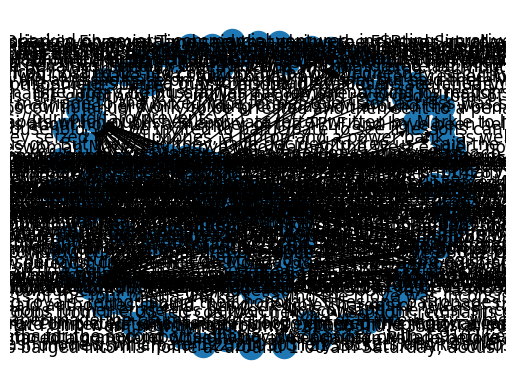

In [9]:
import networkx as nx
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import matplotlib.pyplot as plt

nx_graph = rdflib_to_networkx_multidigraph(graph)
pos = nx.spring_layout(nx_graph, scale=2)

edge_labels = nx.get_edge_attributes(nx_graph, 'r')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)
nx.draw(nx_graph, with_labels=True)

In [20]:
# Adding events to sentences

data = pd.read_csv('data/predictions_100.csv')
data = data.drop(data.columns[0], axis=1)
data['path'] = data['path'].apply(lambda x: str(x)[60:]) #Only keep the general folder structure

In [26]:
data['sentence'].iloc[2]

'"The reason for our success has been that we haven\'t cribbed about pitches that we played on and we would continue to play like that as a team."'

In [27]:
data['sentence']

0     India skipper Virat Kohli on Wednesday credite...
1     "There is always too much noise and too much c...
2     "The reason for our success has been that we h...
3     England captain Joe Root said Test players sho...
4     "I think that's part and parcel of Test cricke...
                            ...                        
95    They seized his cellphones, a laptop and a pow...
96    The soldiers then transported Fitsum to a mili...
97    "They took me down from the car. They said, 'N...
98    "One of them said, 'I can kill you and make up...
99    Eventually they got back in the vehicle, and F...
Name: sentence, Length: 100, dtype: object